In [1]:
%matplotlib notebook

from libsignetsim import SbmlDocument, EquilibriumPointCurve
from matplotlib import pyplot as plt

color_scheme = ['#7ac142','#273d15','#507e2b','#a1ff57']

In [2]:
doc = SbmlDocument()
doc.readSbmlFromFile("sbml_files/ras_das.xml")

In [3]:
parameter = doc.model.listOfVariables.getBySbmlId("total_sos")
variable = doc.model.listOfVariables.getBySbmlId("ras_gtp")
ds = 0.1
max_steps = 1000
fromValue = 100
toValue = 400

In [4]:
t_ep_curve = EquilibriumPointCurve(doc.model)
t_ep_curve.setParameter(parameter)
t_ep_curve.setVariable(variable)
t_ep_curve.setRange(fromValue, toValue)
t_ep_curve.setDs(ds)
t_ep_curve.setMaxSteps(max_steps)
t_ep_curve.build()
t_ep_curve.run()


<IPython.core.display.Javascript object>


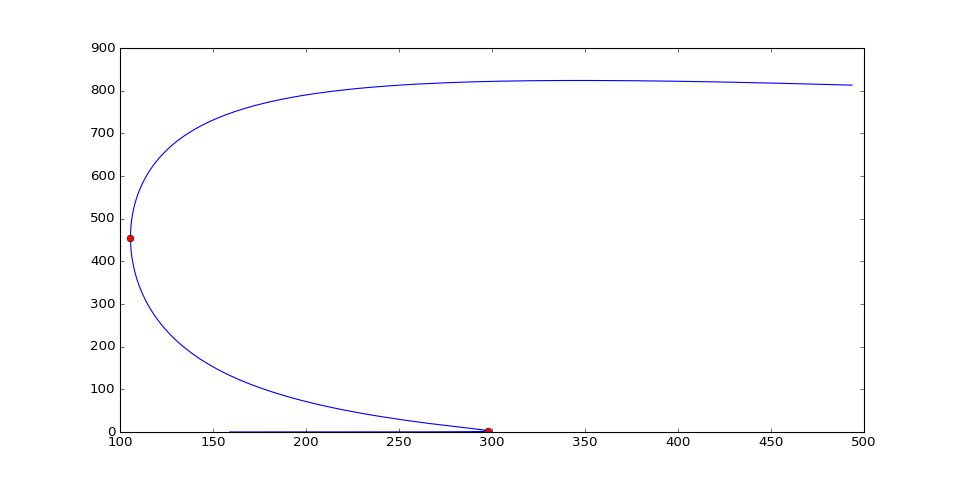

In [5]:
figure = plt.figure(figsize=(12, 6))
        
curves = t_ep_curve.getCurves()
all_points = t_ep_curve.getPoints()

for curve, points in zip(curves, all_points):
    xy = curve[variable.getSymbolStr()]
    x = [x_i for x_i, _ in xy]
    y = [y_i for _, y_i in xy]
    plt.plot(x, y)

    points_var = points[variable.getSymbolStr()]
    x = [x_i for _, x_i, _ in points_var]
    y = [y_i for _, _, y_i in points_var]
    plt.plot(x, y, 'ro')